Explanatory data analysis

In [57]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#uploading data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
dataset = pd.concat([train,test])
dataset.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0.0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0.0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0.0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0.0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0.0,0,0,0,0,0


# Data Cleaning and Data Preparation

### Handling Duplicates

In [4]:
print(f"#duplicateRows in Train set: {train[train.drop(columns=['id']).duplicated()].shape[0]}") #numer of duplicates data in train set
print(f"#duplicateRows in Test set: {test[test.drop(columns=['id']).duplicated()].shape[0]}")

#duplicateRows in Train set: 1134
#duplicateRows in Test set: 523


In [5]:
#removing duplicates
train.drop_duplicates(subset=train.columns.difference(['id']),inplace=True)
test.drop_duplicates(subset=test.columns.difference(['id']), inplace=True)

### Exploring Data Types

In [12]:
print("Columns type of Train set:")
train.dtypes

Columns type of Train set:


id                           int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [13]:
print("Columns type of Test set:")
test.dtypes

Columns type of Test set:


id                           int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [28]:
categorical_columns = train.select_dtypes(include=['object']).columns.values
assert categorical_columns.all() == test.select_dtypes(include=['object']).columns.values.all()

In [32]:
#Calculating unique values of categorical features
for col in categorical_columns:
    print(f"{col}.unique = {len(train[col].unique())}") #Since Product Id has too many unique values we cannot use one-hot encoding for this categorical feature because that will increase the dimesion of the feature space too much, resulting in slowing down the training time
    

Product ID.unique = 9976
Type.unique = 3


In [29]:
#ONE-HOT ENCODING OF CATEGORICAL FEATURES
for col in categorical_columns:
    

Product ID
Type


### Missing Values

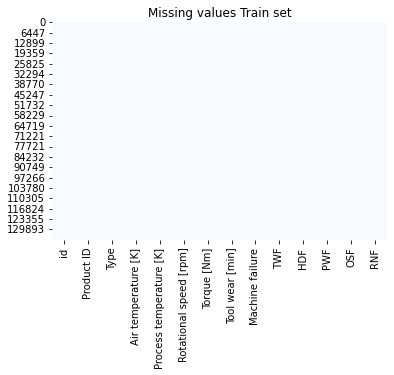

In [10]:
# Visualize missing values Train set
sns.heatmap(train.isnull(), cbar=False, cmap='Blues')
plt.title('Missing values Train set')
plt.show()

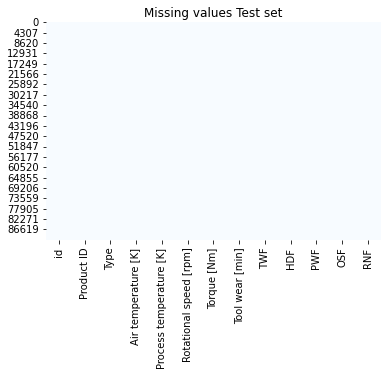

In [11]:
# Visualize missing values Test set
sns.heatmap(test.isnull(), cbar=False, cmap='Blues')
plt.title('Missing values Test set')
plt.show()

### Basic Statistics

### Univariate analysis

In [35]:
numerical_columns = train[train.columns.difference(['id'])].select_dtypes(include=['int64', 'float64']).columns.values
numerical_columns

array(['Air temperature [K]', 'HDF', 'Machine failure', 'OSF', 'PWF',
       'Process temperature [K]', 'RNF', 'Rotational speed [rpm]', 'TWF',
       'Tool wear [min]', 'Torque [Nm]'], dtype=object)

AttributeError: 'numpy.ndarray' object has no attribute 'xaxis'

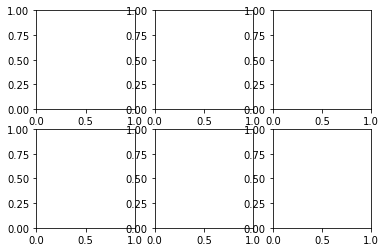

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=3)
for i,col in enumerate(numerical_columns):
    ax = axes[i]
    sns.histplot(data=train[col], ax=ax)
plt.show()


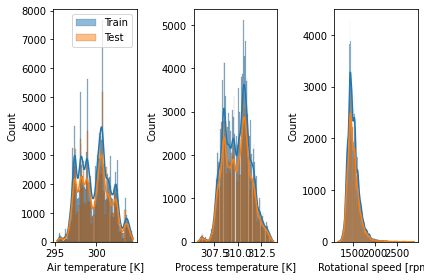

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
sns.histplot(data=train['Air temperature [K]'], kde=True, label='Train', ax=ax1)
sns.histplot(data=test['Air temperature [K]'], kde=True, ax=ax1, label='Test')
ax1.legend()
sns.histplot(data=train['Process temperature [K]'], kde=True, label='Train', ax=ax2)
sns.histplot(data = test['Process temperature [K]'], kde=True, label='Test', ax=ax2)
sns.histplot(data=train['Rotational speed [rpm]'], kde=True, label='Train', ax=ax3)
sns.histplot(data=test['Rotational speed [rpm]'], kde=True, label='Test', ax=ax3)
plt.tight_layout()
plt.show()

### Correlation Matrix

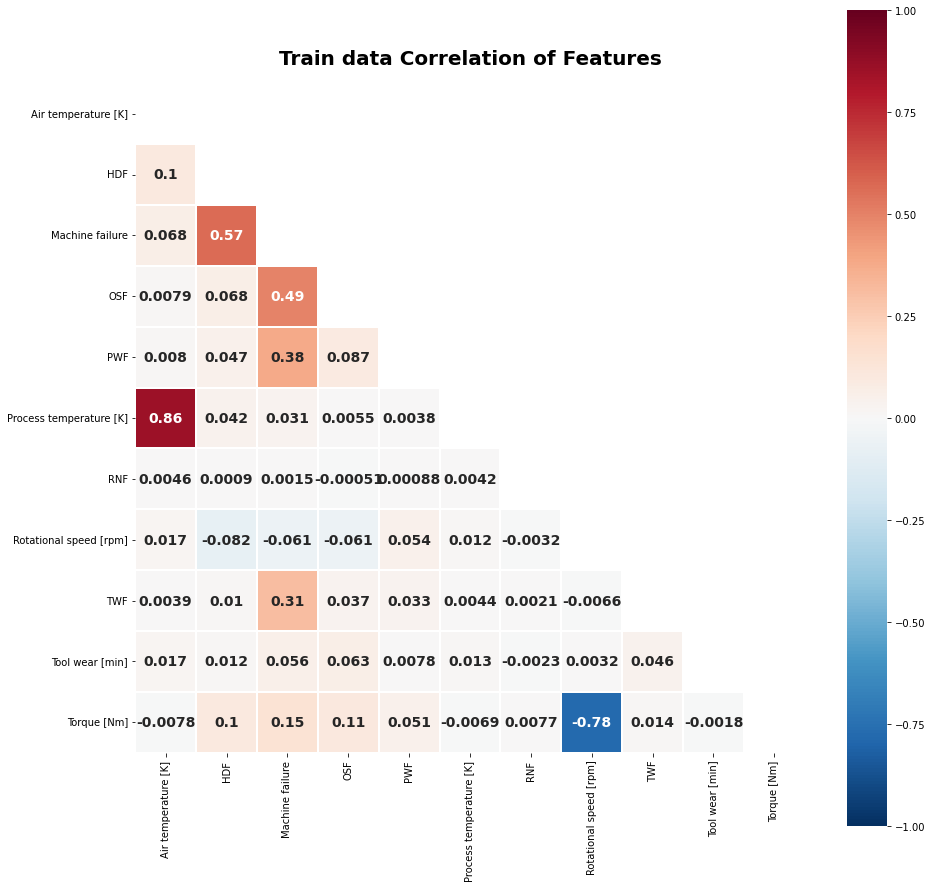

In [70]:
#CORRELATION MATRIX
def plot_heatmap(df, title):
    # Create a mask for the diagonal elements
    mask = np.zeros_like(df.astype(float).corr())
    mask[np.triu_indices_from(mask)] = True

    # Set the colormap and figure size
    colormap = plt.cm.RdBu_r
    plt.figure(figsize=(15, 15))

    # Set the title and font properties
    plt.title(f'{title} Correlation of Features', fontweight='bold', y=1.02, size=20)

    # Plot the heatmap with the masked diagonal elements
    sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1.0, 
                square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 14, "weight": "bold"},
                mask=mask)

plot_heatmap(train[numerical_columns], title='Train data')
#plot_heatmap(test[np.delete(numerical_columns, 'Machine failure')], title='Test data') #not working

### Bivariate analysis

C:\Users\aabati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


C:\Users\aabati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\aabati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


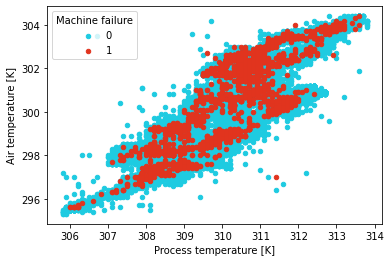

In [71]:
ax = train[train['Machine failure']==0].plot.scatter(x='Process temperature [K]', y='Air temperature [K]', c='#1ECBE1', label='0')
train[train['Machine failure']==1].plot.scatter(x='Process temperature [K]', y='Air temperature [K]', c='#E1341E', label='1', ax=ax)
ax.legend(title='Machine failure')

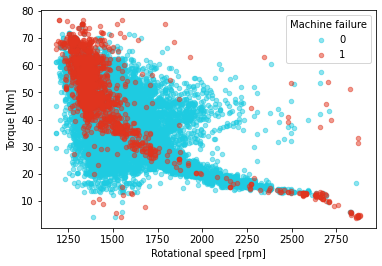

In [74]:
ax = train[train['Machine failure']==0].plot.scatter(x='Rotational speed [rpm]', y='Torque [Nm]', c='#1ECBE1', label='0',alpha=0.5)
train[train['Machine failure']==1].plot.scatter(x='Rotational speed [rpm]', y='Torque [Nm]', c='#E1341E', label='1', ax=ax, alpha =0.5)
ax.legend(title='Machine failure')